# **Mercedes Benz price dataset**


## **Loading and reading the data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
work_area = r'C:\Users\curci\Desktop\Data Science Courses\Linear_regression project\Dataset\usa_mercedes_benz_prices.csv'
df=pd.read_csv(work_area)

In [3]:
df.head()

Name     Mileage  Rating Review Count  \
0    2021 Mercedes-Benz A-Class A 220 4MATIC  29,636 mi.     3.9       1,800    
1          2022 Mercedes-Benz AMG SL 63 Base   5,540 mi.     4.7       1,239    
2          2022 Mercedes-Benz AMG SL 63 Base   4,890 mi.     4.7       1,239    
3    2020 Mercedes-Benz AMG E 53 Base 4MATIC  29,746 mi.     4.8         752    
4  2021 Mercedes-Benz AMG GLS 63 Base 4MATIC  32,631 mi.     5.0       1,502    

      Price  
0   $30,900  
1  $139,999  
2  $132,999  
3   $58,587  
4   $95,990

In [4]:
df.shape

(2429, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2429 entries, 0 to 2428
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          2429 non-null   object 
 1   Mileage       2429 non-null   object 
 2   Rating        2135 non-null   float64
 3   Review Count  2398 non-null   object 
 4   Price         2429 non-null   object 
dtypes: float64(1), object(4)
memory usage: 95.0+ KB


## **Data Preparation**

### **Selection of the examples that are priced**

There are some examples that do not have prices; we then select the ones that are priced.

In [6]:
# Selection of the examples that are priced
df = df[df['Price'] != 'Not Priced']

### **Check the duplicates**

We check for duplicated and drop them eventually.

In [7]:
# Check for duplicates
if df.duplicated().any():
    print('There are duplicates')
    df=df.drop_duplicates()
else:
    print('no')

There are duplicates


### **Changing the type 'object' into 'category'**

We change the dtype of 'object' columns, which are 'Name', 'Mileage', 'Review Count', 'Price', into 'category' for a better performance.

In [8]:
## Changing the 'object' attributes in 'category' attributes
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

### **Clean the data**

The values of some attributes are characterized by the presence of certain characters that prevent us from converting the dtype of the columns to numeric:
- 'Price' : we drop the $ symbol
- 'Milage' : we drop the unity of measure 'mi.'
- 'Review Count' : we drop the ',' which is used to separate thousands

In [9]:
## Remove the unnecessary elements from the other attributes and change the dtypes
df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '').str.strip().astype('float64')
df['Mileage'] = df['Mileage'].str.replace(' mi.', '').str.replace(',', '').str.strip().astype('float64')
df['Review Count'] = df['Review Count'].str.replace(',', '').str.strip().astype('float64')

C:\Users\curci\AppData\Local\Temp\ipykernel_9720\2871719621.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '').str.strip().astype('float64')
C:\Users\curci\AppData\Local\Temp\ipykernel_9720\2871719621.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Mileage'] = df['Mileage'].str.replace(' mi.', '').str.replace(',', '').str.strip().astype('float64')


We handle the 'Name' column: 
- We create the new attribute 'Model Year' from the attribute 'Name'
- We remove the year from 'Name' creating the new attribute 'Model'

In [10]:
## Handeling the 'Name' column 
import re

df.rename(columns={'Name': 'Model'}, inplace=True)
df['Model Year'] = df['Model'].str.extract(r'(\d{4})') 
df['Model Year'] = df['Model Year'].str.replace(',', '').str.strip().astype('int64')

def remove_year(text):
    return re.sub(r'\b\d{4}\b', '', text).strip()

# Apply the function to the 'Model' column
df['Model'] = df['Model'].apply(lambda x: remove_year(x))

In [11]:
df.head()

Model  Mileage  Rating  Review Count  \
0    Mercedes-Benz A-Class A 220 4MATIC  29636.0     3.9        1800.0   
1          Mercedes-Benz AMG SL 63 Base   5540.0     4.7        1239.0   
2          Mercedes-Benz AMG SL 63 Base   4890.0     4.7        1239.0   
3    Mercedes-Benz AMG E 53 Base 4MATIC  29746.0     4.8         752.0   
4  Mercedes-Benz AMG GLS 63 Base 4MATIC  32631.0     5.0        1502.0   

      Price  Model Year  
0   30900.0        2021  
1  139999.0        2022  
2  132999.0        2022  
3   58587.0        2020  
4   95990.0        2021

### **Handling null values**
Since some algorithms cannot work with null values, we handle the null values in four different ways:
1.  - For numeric columns, calculate the mean and replace null values with this mean,
    - For categorical columns, calculate the mode and replace null values with this mode;
2. Replace with estimates following a straight line between the nearest non-null values through interpolation;
3. Replace them with random samples taken from the non-null values of that column;
4. Remove all rows that contain at least one null value.
At the end we observe which way is better.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2396 entries, 0 to 2428
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Model         2396 non-null   object 
 1   Mileage       2396 non-null   float64
 2   Rating        2104 non-null   float64
 3   Review Count  2365 non-null   float64
 4   Price         2396 non-null   float64
 5   Model Year    2396 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 131.0+ KB


In [13]:
df.isnull().sum()

Model             0
Mileage           0
Rating          292
Review Count     31
Price             0
Model Year        0
dtype: int64

The attributes that have at least one null value are 'Rating' and 'Review Count'. In paricular:
- 'Rating' has 292 null values
- 'Review Count' has 31 null values

#### **Handling null values with mean, median and mode**
Let us first plot histograms and box plots of the attributes with null values to decide which statistical metric to use for handling the missing values.

**'Rating'**

Text(0.5, 1.0, 'Box plot of Rating')

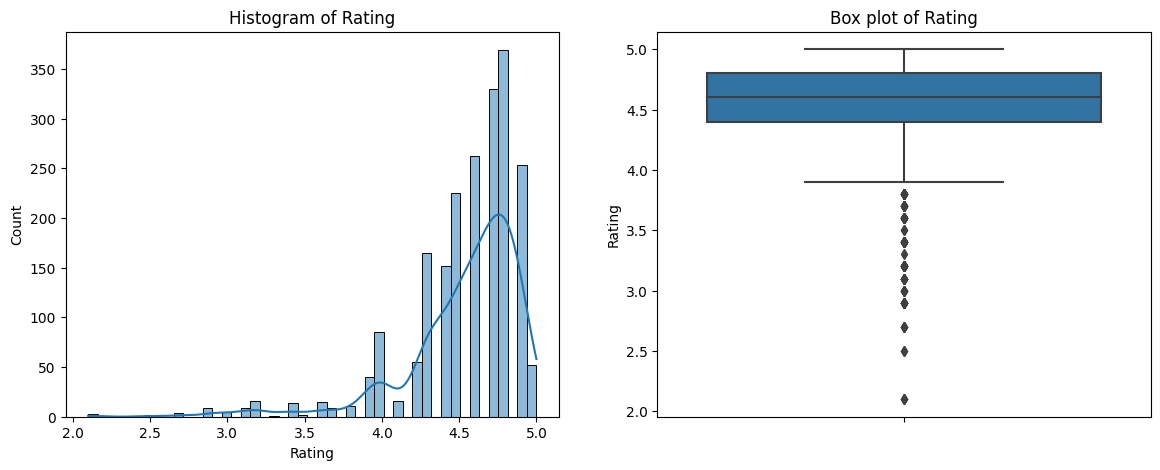

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
# Istogramma
sns.histplot(df['Rating'], kde=True, ax=axes[0])
axes[0].set_title(f'Histogram of Rating')
    
# Box plot
sns.boxplot(y=df['Rating'], ax=axes[1])
axes[1].set_title(f'Box plot of Rating')

Since the distribution is skewed on the left the best choise is to substitute the null value with the median of the attribute.

In [15]:
df1= df.copy()
df1['Rating'].fillna(df1['Rating'].median(), inplace=True)

In [16]:
df1.isnull().sum()

Model            0
Mileage          0
Rating           0
Review Count    31
Price            0
Model Year       0
dtype: int64

**'Review Count'**

Text(0.5, 1.0, 'Box plot of Review Count')

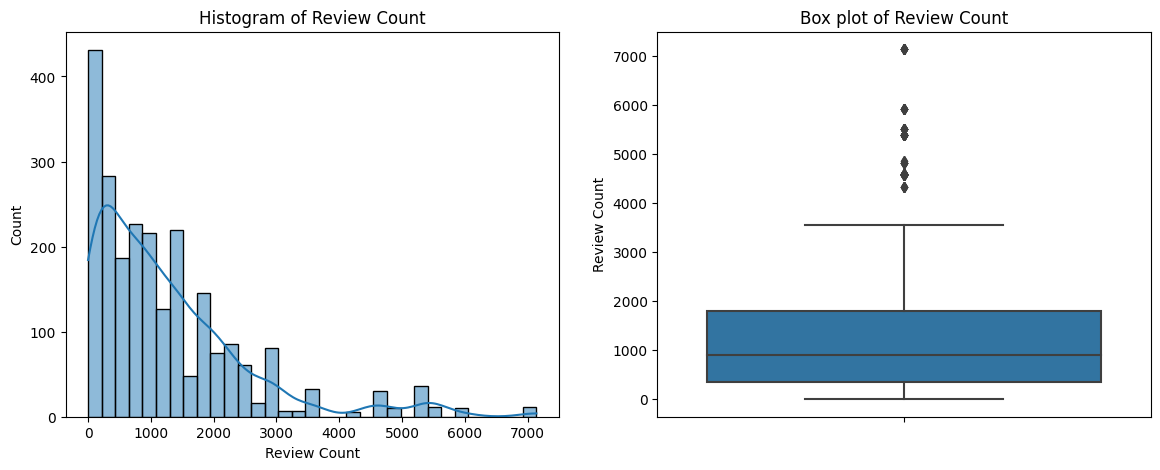

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
# Istogramma
sns.histplot(df['Review Count'], kde=True, ax=axes[0])
axes[0].set_title(f'Histogram of Review Count')
    
# Box plot
sns.boxplot(y=df['Review Count'], ax=axes[1])
axes[1].set_title(f'Box plot of Review Count')

Since the distribution is skewed on the right the best choise is to substitute the null value with the median of the attribute.

In [18]:
df1['Review Count'].fillna(df1['Review Count'].median(), inplace=True)

In [19]:
df1.isnull().sum()

Model           0
Mileage         0
Rating          0
Review Count    0
Price           0
Model Year      0
dtype: int64

### **Handling null values with interpolation**

The missing values are filled using linear interpolation.

In [20]:
df2=df.copy()
df2['Rating'].interpolate(method='linear',inplace=True)
df2['Review Count'].interpolate(method='linear',inplace=True)

In [21]:
df2.isnull().sum()

Model           0
Mileage         0
Rating          0
Review Count    0
Price           0
Model Year      0
dtype: int64

### **Handling null values with random sample**
We extract a random value of the attribute, then we replace the null values with it.

In [22]:
df3=df.copy()
np.random.seed(40)

**'Rating'**

In [23]:
sample=df3['Rating'].sample().values[0]
df3['Rating']=df3['Rating'].fillna(sample)

**'Review Count'**

In [24]:
sample=df3['Review Count'].sample().values[0]
df3['Review Count']=df3['Review Count'].fillna(sample)

In [25]:
df3.isnull().sum()

Model           0
Mileage         0
Rating          0
Review Count    0
Price           0
Model Year      0
dtype: int64

### **Handling null values dropping rows**
Remove all rows that contain at least one null value.

In [26]:
df4=df.copy()
df4.dropna(axis=0, inplace=True)
df4.reset_index(drop=True,inplace=True)

In [27]:
df4.isnull().sum()

Model           0
Mileage         0
Rating          0
Review Count    0
Price           0
Model Year      0
dtype: int64

### **Handling the outliers**
Managing outliers is essential to ensure that data analysis and models are accurate, reliable, and representative of the underlying reality, thus avoiding distortions and misinterpretations of results. 

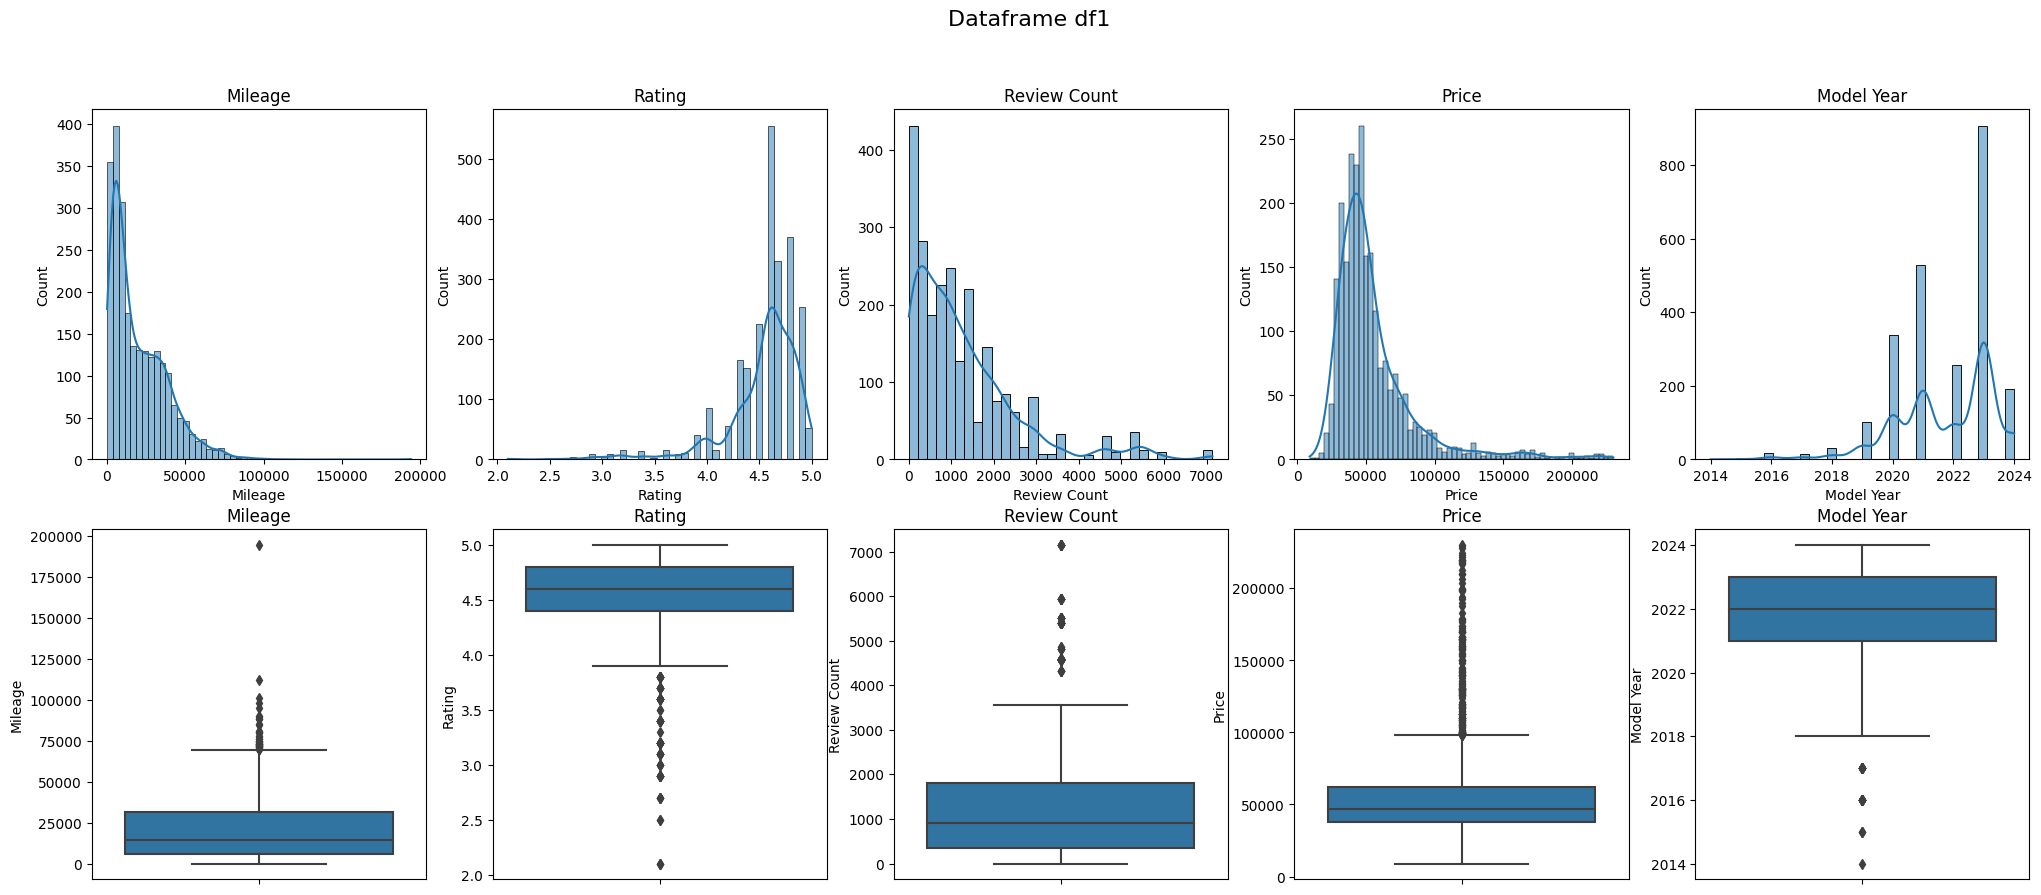

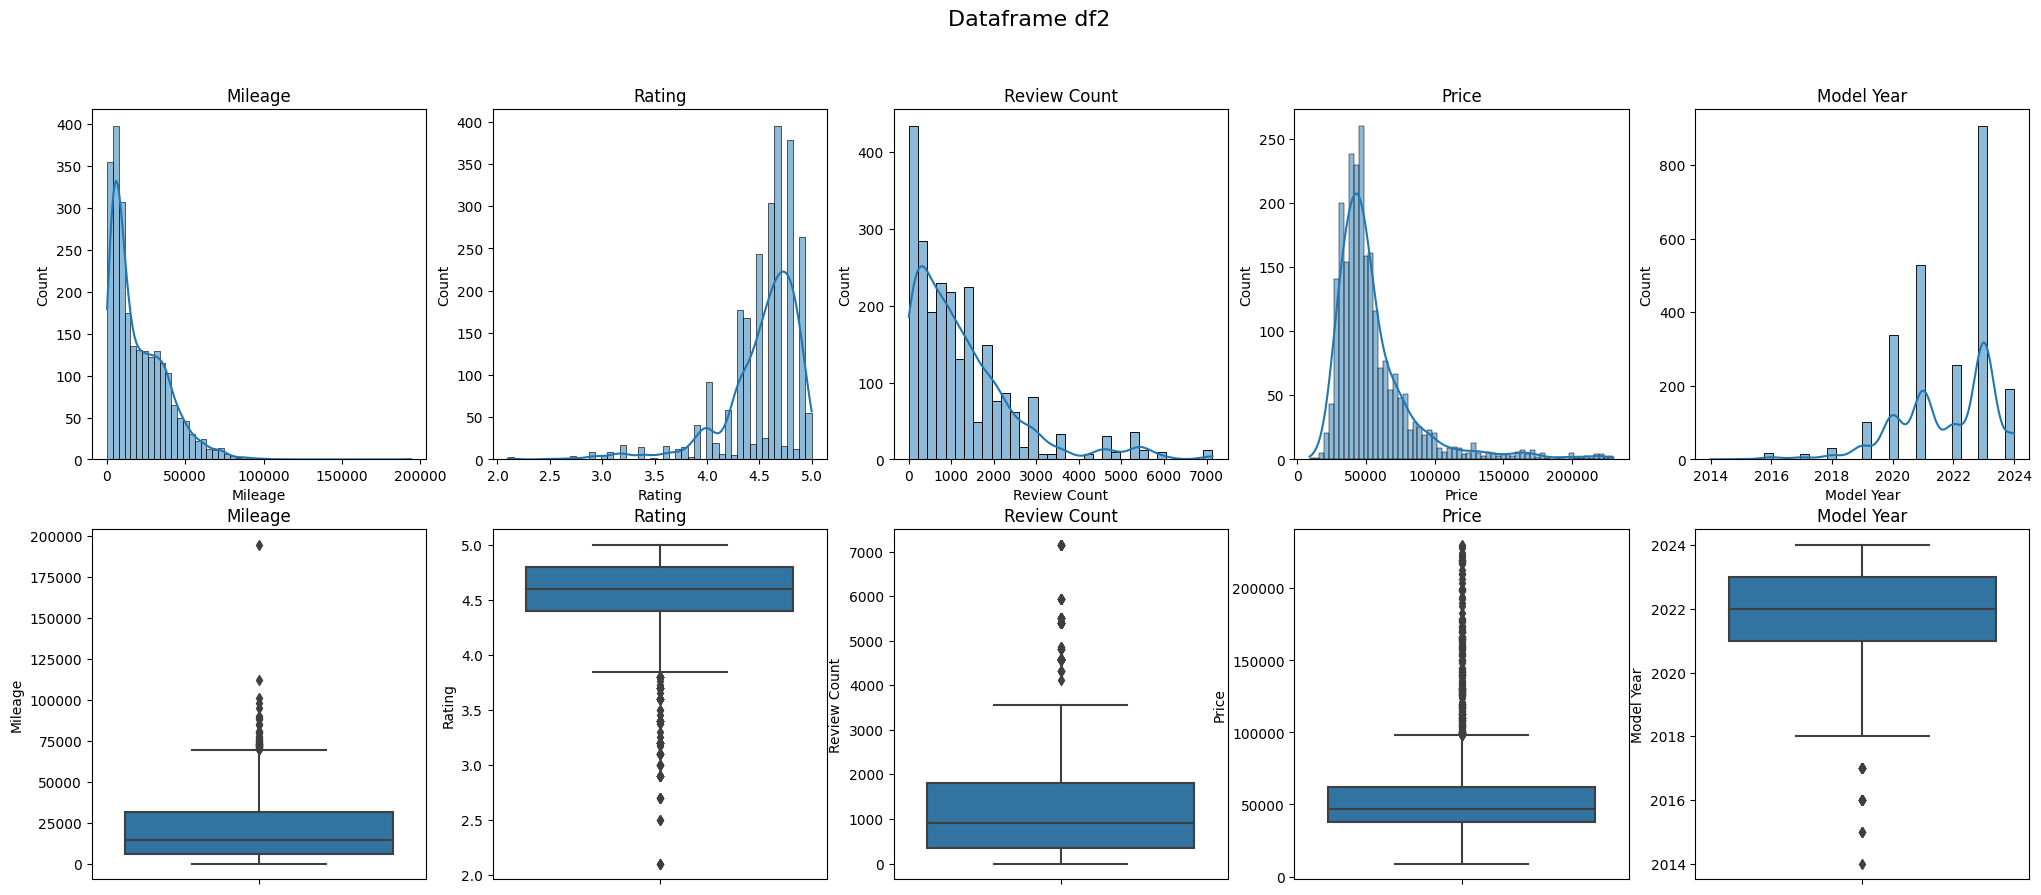

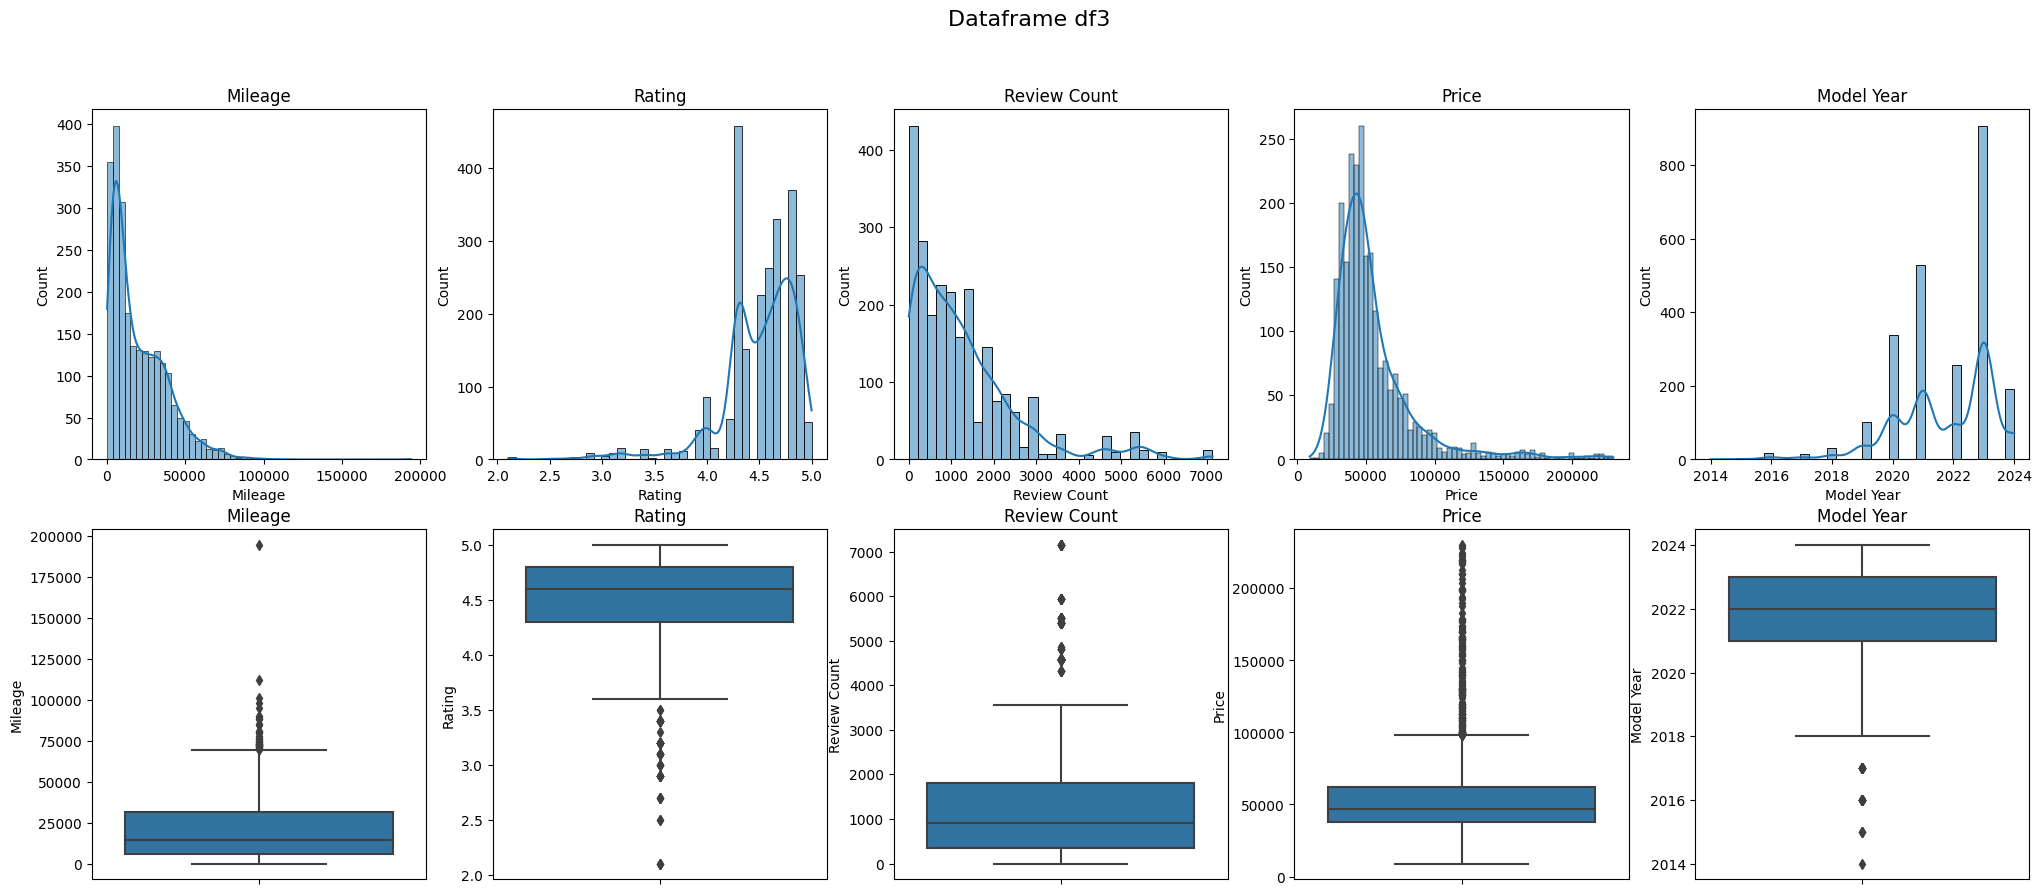

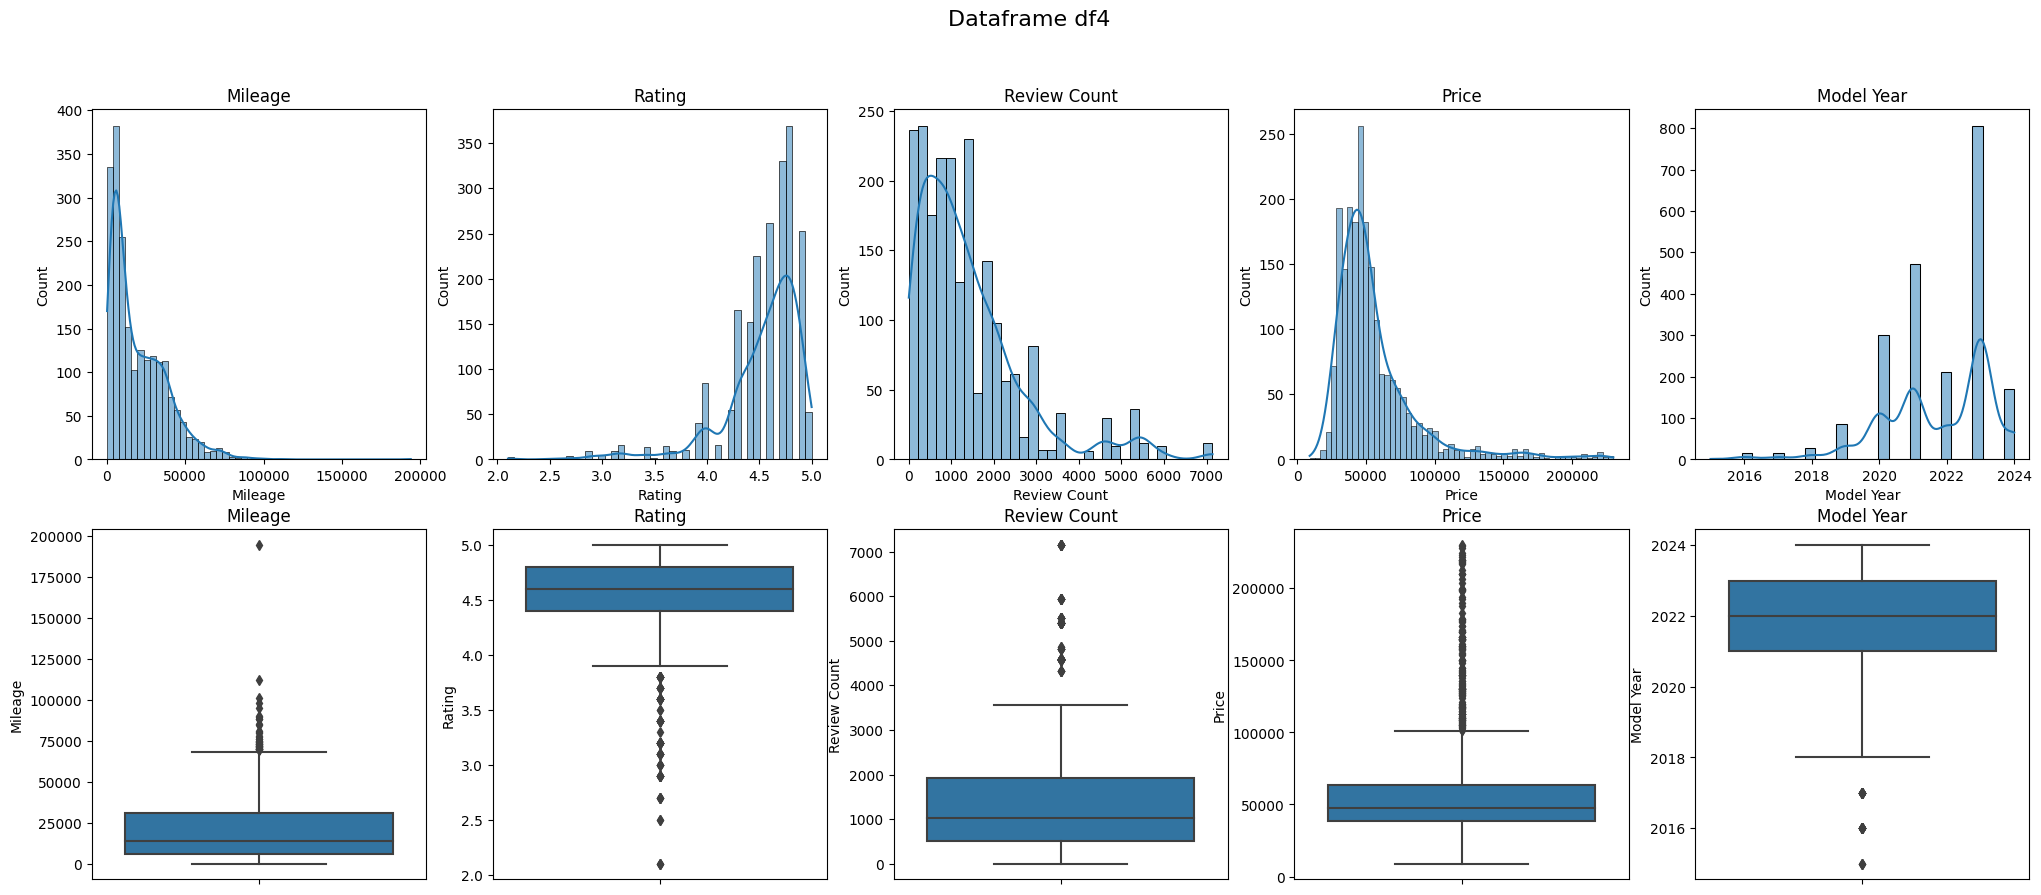

In [28]:
dict_dataset={1:df1,2:df2,3:df3,4:df4}

for i in range(1,5):
    n = dict_dataset[i].select_dtypes(include='number').shape[1]
    fig, axes = plt.subplots(2, n, figsize=(25, 10))
    fig.suptitle(f'Dataframe df{i}', fontsize=16)
    count=0
    for col in dict_dataset[i].select_dtypes(include='number').columns:
        # Istogramma
        sns.histplot(dict_dataset[i][col], kde=True, ax=axes[0,count])
        axes[0,count].set_title(f'{col}')       
        # Box plot
        sns.boxplot(y=dict_dataset[i][col], ax=axes[1,count])
        axes[1,count].set_title(f'{col}')
        count+=1


We decide to do this using the function *remove_outliers_from_columns*  which cleans a DataFrame from data points that significantly deviate from the majority of other values in the same column. 

The upper and lower bounds beyond which outliers are removed are determined by

- upper_bound = $Q3 + 1.5 * IQR$
- lower_bound = $Q1 - 1.5 * IQR$

where $Q1$ and $Q3$ are first and third quartiles, respectivelly, and $IQR=Q3−Q1$ is the interquartile range.

In [29]:
# Function to remove outliers
def remove_outliers_from_column(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    df_no_outliers.reset_index(drop=True, inplace=True)
    return df_no_outliers

In [30]:
for i in range(1,5):
    for col in dict_dataset[i].select_dtypes(include='number').columns:
        dict_dataset[i]=remove_outliers_from_column(dict_dataset[i],col)

df1=dict_dataset[1].copy()
df2=dict_dataset[2].copy()
df3=dict_dataset[3].copy()
df4=dict_dataset[4].copy()

### **Bivariate analysis**
Explore and understand the relationships between two variables.

#### **Scatter plots**

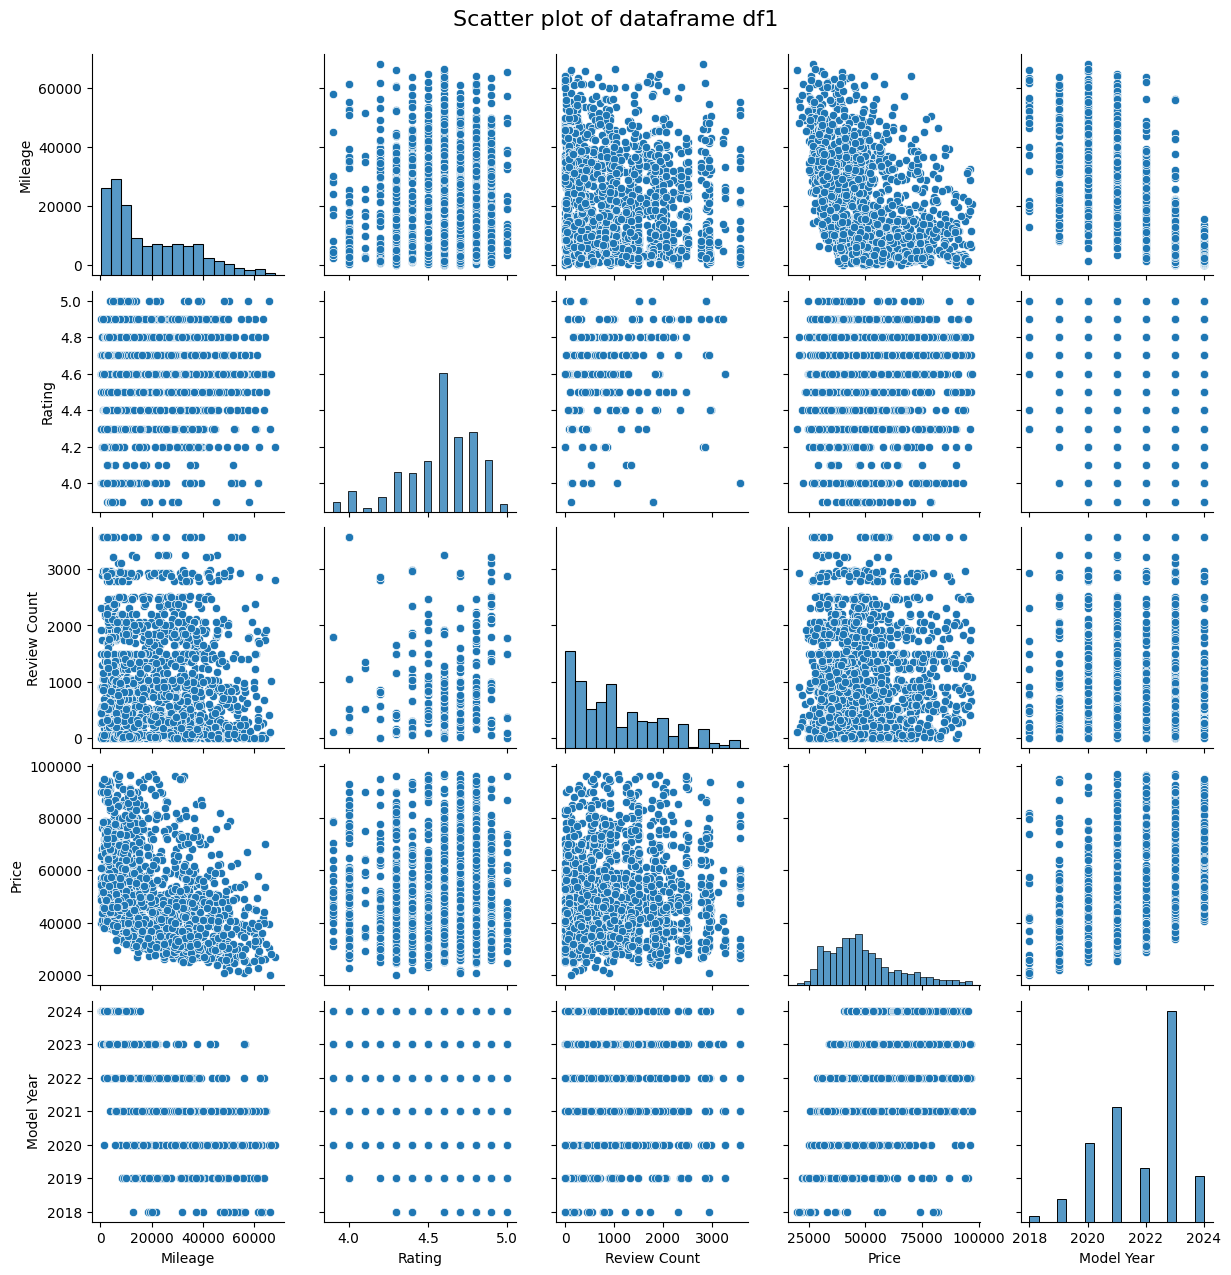

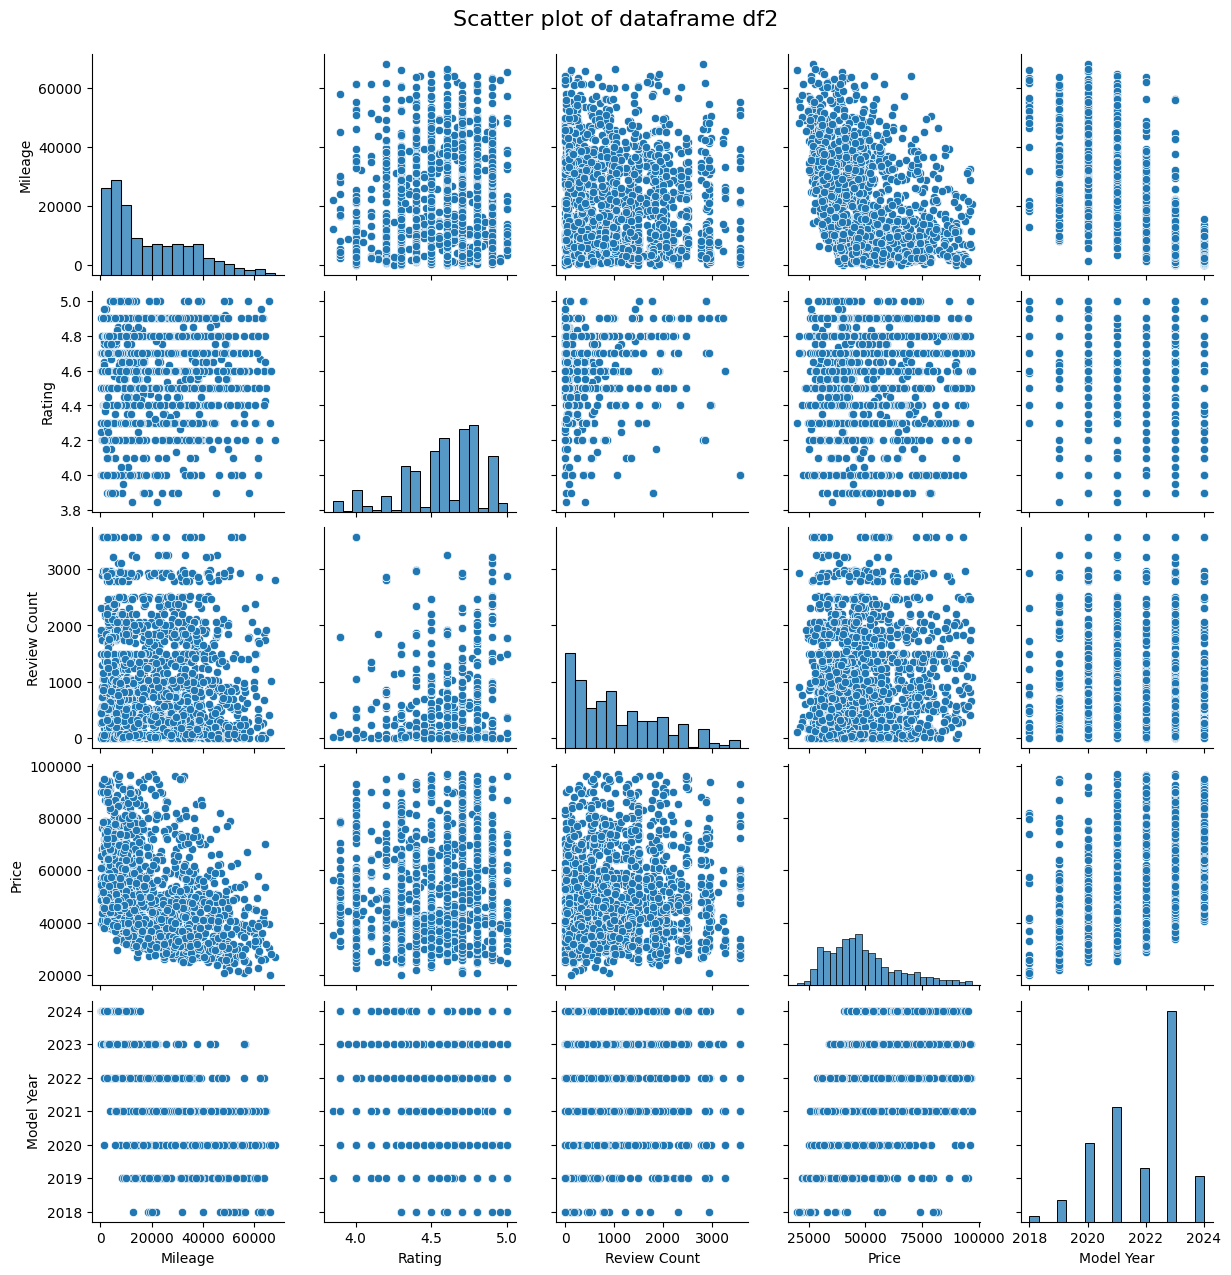

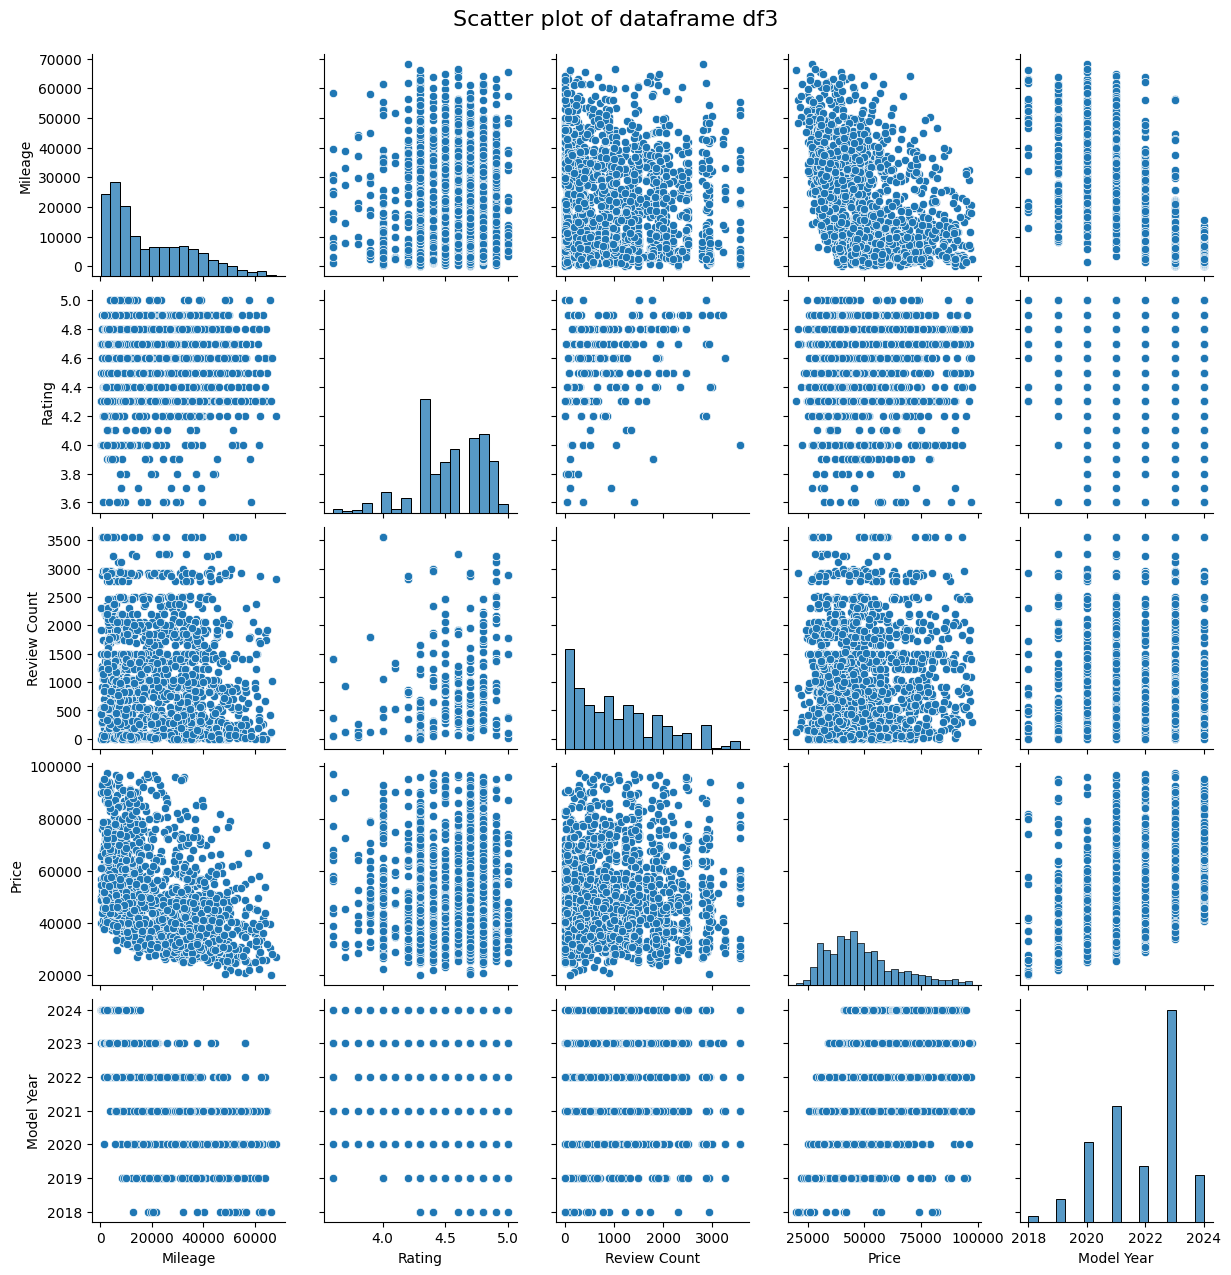

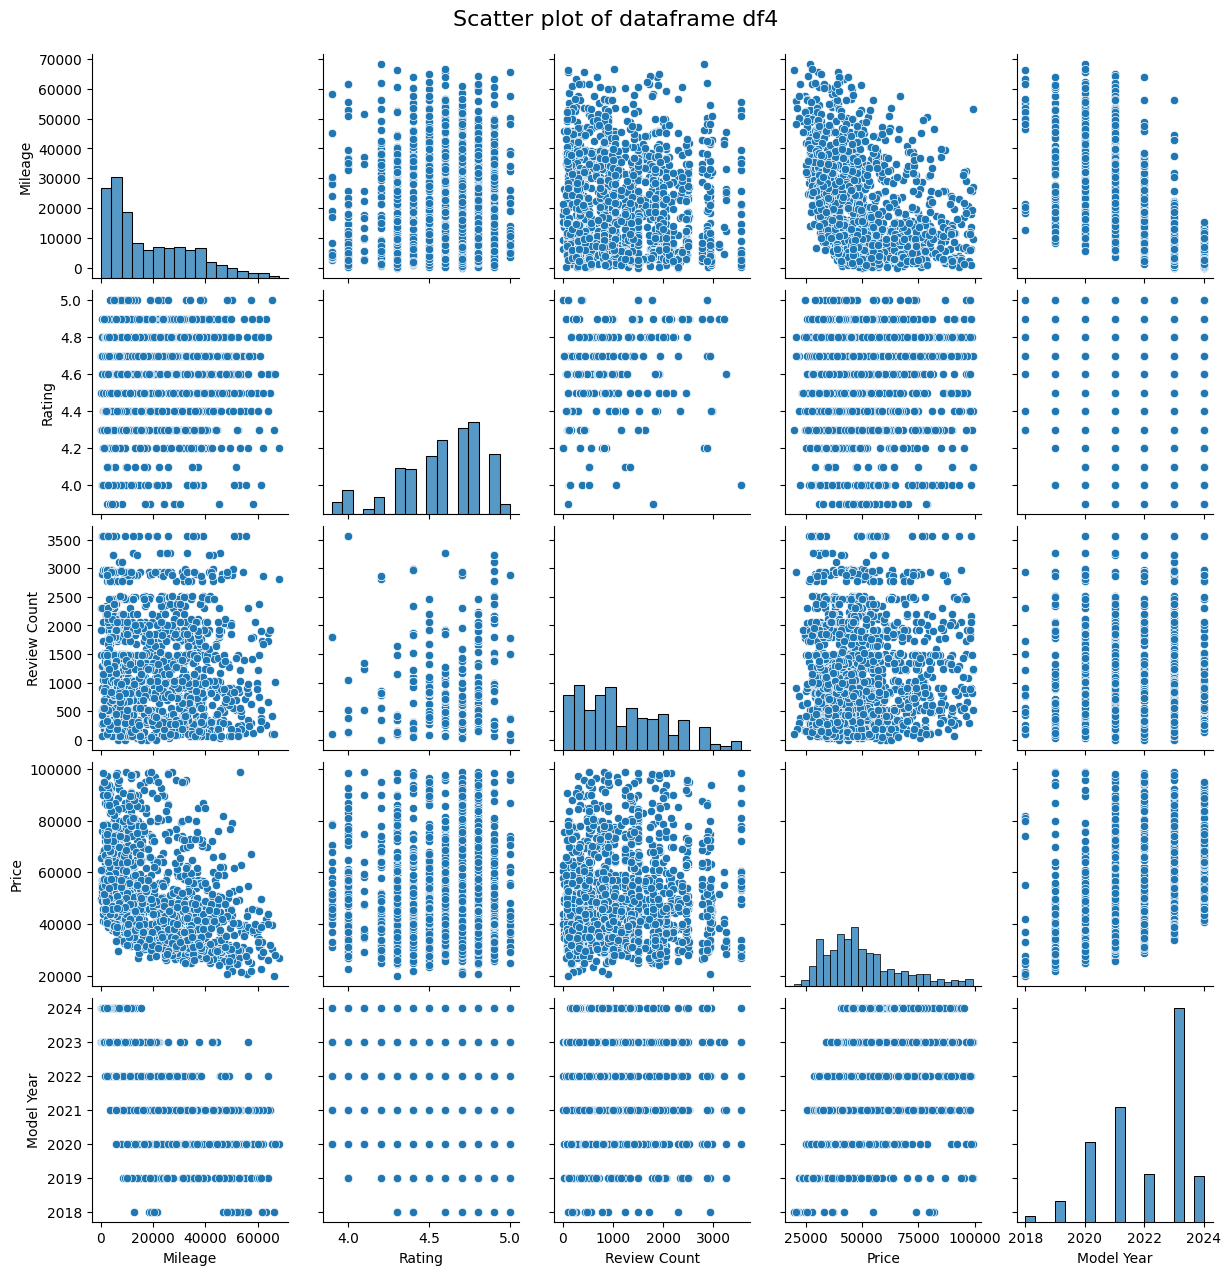

In [31]:
dict_dataset={1:df1,2:df2,3:df3,4:df4}
for i in range(1,5):
    numeric_columns=dict_dataset[i].select_dtypes(include='number')
    sns.pairplot(numeric_columns)
    plt.suptitle(f'Scatter plot of dataframe df{i}', y=1.02, fontsize=16)
    plt.show()


#### **Correlation Matrix**

C:\Users\curci\AppData\Local\Temp\ipykernel_9720\3756321949.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dict_dataset[i].corr(), annot=True, cmap='coolwarm', fmt=".2f")


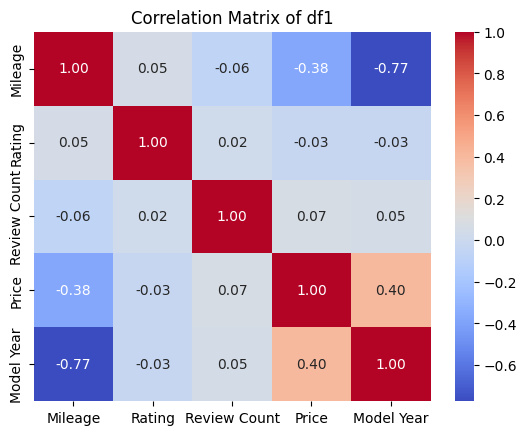

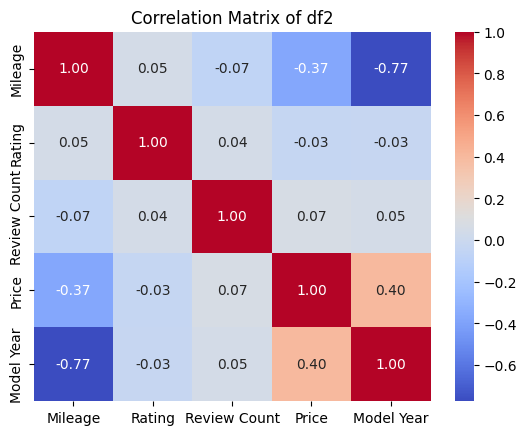

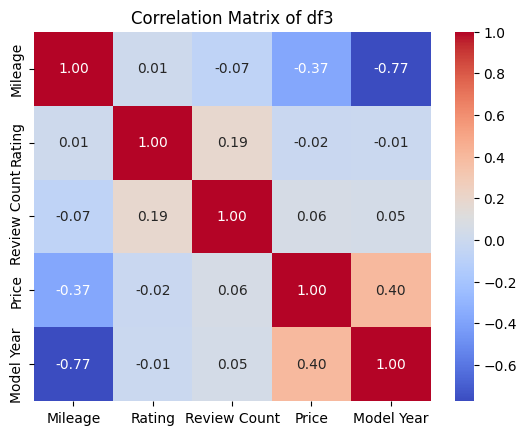

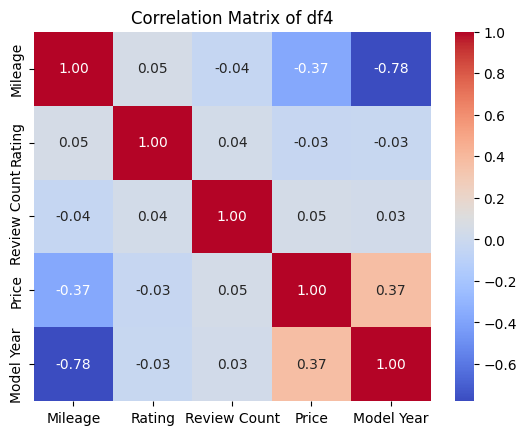

In [32]:
for i in range(1,5):
    sns.heatmap(dict_dataset[i].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix of df{i}')
    plt.show()

It appears there is a positive correlation between the 'Model Year' and 'Price', indicating that newer cars cost more.

#### **Relationship between 'Price' and 'Model Year'**

We visualize the trend of average prices over time. We calculate the mean prices per year and plot to represent them for a visual comparison of how average prices vary over time.

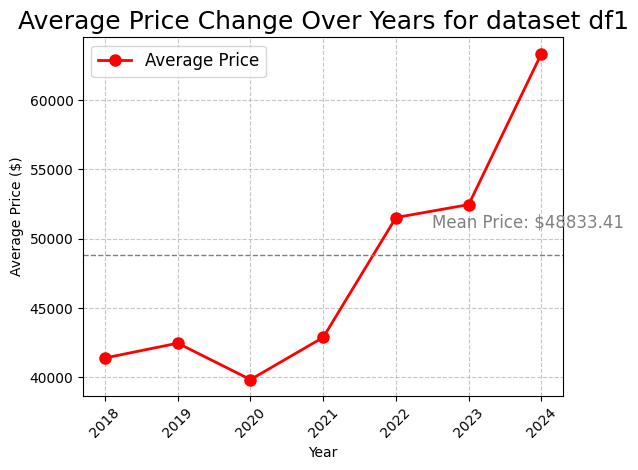

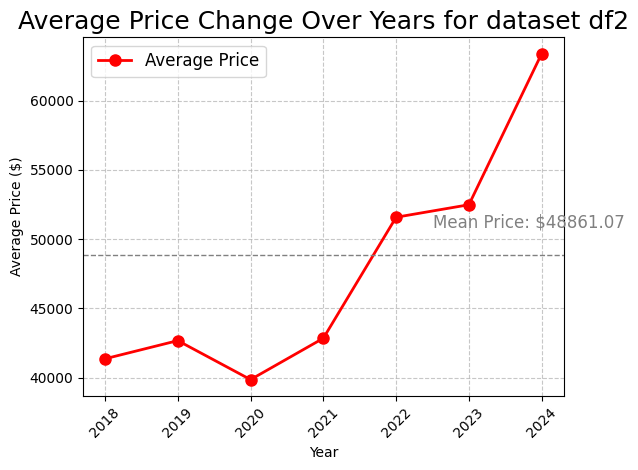

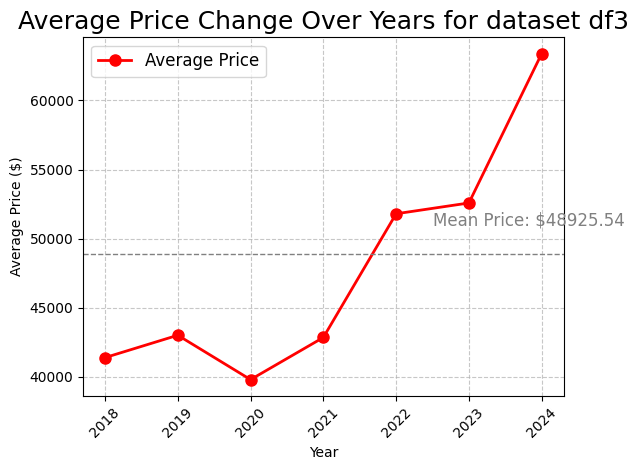

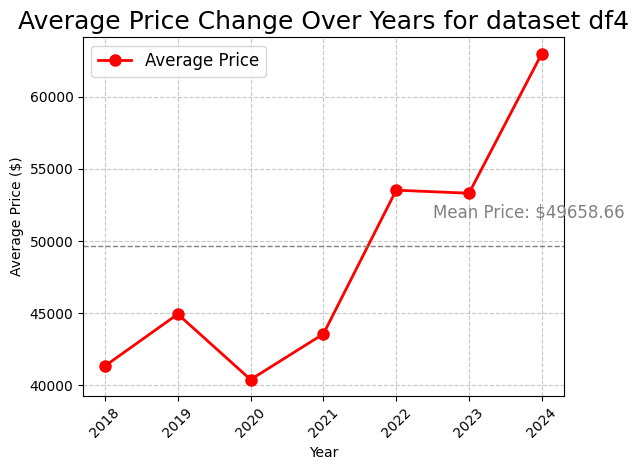

In [33]:
for i in range(1, 5):
    average_prices = dict_dataset[i].groupby('Model Year')['Price'].mean()

    # Create the plot with style
    plt.plot(average_prices.index, average_prices.values, marker='o', linestyle='-', color='red', linewidth=2, markersize=8)

    # Title and labels
    plt.title(f'Average Price Change Over Years for dataset df{i}', fontsize=18)
    plt.xlabel('Year')
    plt.ylabel('Average Price ($)')
    plt.xticks( rotation=45)
    plt.yticks()

    plt.grid(True, linestyle='--', alpha=0.7)

    mean_price = dict_dataset[i]['Price'].mean()
    plt.axhline(mean_price, color='gray', linestyle='--', linewidth=1)

    plt.text(2022.5, mean_price + 2000, f'Mean Price: ${mean_price:.2f}', fontsize=12, color='gray')

    plt.legend(['Average Price'], loc='upper left', fontsize=12)

    plt.tight_layout()
    plt.show()

### **Categorical attributes**
Since we want to create a linear regression model, we need to transform categorical attributes into numerical ones.

In [34]:
df.select_dtypes(include='category').columns

Index([], dtype='object')

The only categorical column present is 'Model'. 

The simplest and most straightforward way to handle it is encoding each unique value in the column with an integer.

In [35]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoders = {}
for i in range(1,5):
    label_encoders[i] = LabelEncoder()
    dict_dataset[i]['Model']=label_encoders[i].fit_transform(dict_dataset[i]['Model'])
    dict_dataset[i]['Model'] = dict_dataset[i]['Model'].astype('int64')


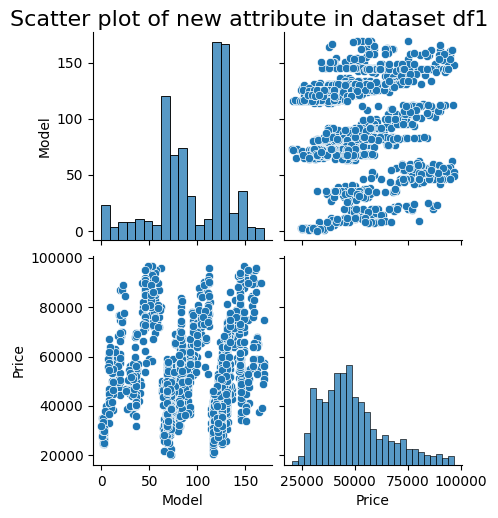

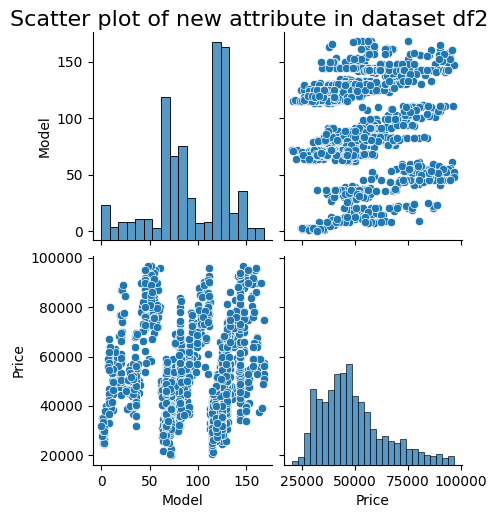

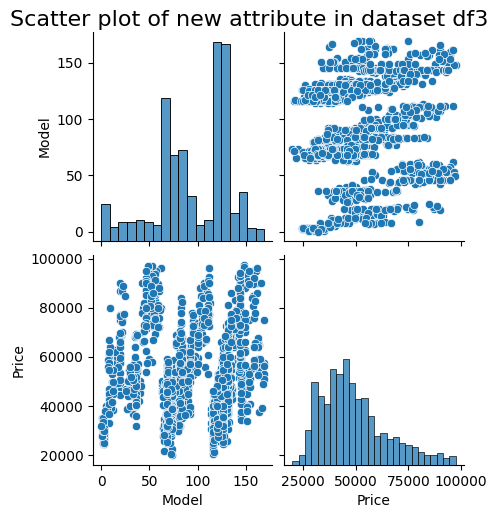

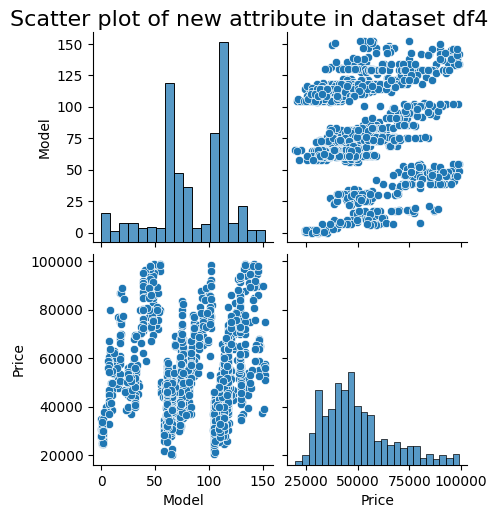

In [36]:
for i in range(1,5):
    new_columns=dict_dataset[i][['Model','Price']]
    sns.pairplot(new_columns)
    plt.suptitle(f'Scatter plot of new attribute in dataset df{i}', y=1.02, fontsize=16)
    plt.show()

## **Create the model**

Let us build a multiple linear regression model with gradient descent for weight learning and test it on various datasets using metrics such as mean square error and R2 score.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Since the features varied in different large scale of values we normalized them using the formula 
$$
Z=\frac{x-\bar{x}}{std}
$$
where $\bar{x}$ is the sample mean of the relative feature and $std$ the standard deviation.

In [38]:
def normalization(ds):
    means = np.mean(ds, axis=0)
    stds = np.std(ds, axis=0)
    normalized_data = (ds - means) / stds
    return normalized_data

In [39]:
def split_norm(ds, targetvalue):
    ds_norm=normalization(ds)
    y = ds_norm[targetvalue]
    X = ds_norm.drop(columns=[targetvalue])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

We compute the function model given by
$$
f_{w,b}(\vec{x})=\vec{w}\cdot\vec{x}+b
$$

In [40]:
def predict(x,w,b):
    return np.dot(x,w)+b

The used cost function is given by the *mean square error* 
$$
J(w,b)=c\ l_2(w,b)+\frac{1}{2m}\sum_{i=1}^m (f(x_i)-y_i)^2 
$$
where 
- $m$ is the number of the training examples
- $x_i$ is the $i-th$ training example and $y_i$ its target value
- $l_2$ is a regulation term to prevent the overfitting given by
$$
l_2=b^2 + \sum_{j=1}^n w_j^2
$$
 where $n$ is the number of feature.
- $c$ is a constant

In [41]:
def compute_loss(X,y,w,b,c):
    m=X.shape[0]
    pred=predict(X,w,b)
    parameter = np.concatenate((w, np.array([b])))
    l2 =  np.square(np.linalg.norm(parameter, 2))
    loss = 1/2 * np.mean(np.square(pred-y))+c/(2*m)*l2
    return loss

The *gradient descent* algorithm works in the following way:

1. *Start with some $w,b$*: the common choice is to set $w=0$ and $b=0$. Another possibility is to sample the parameter according to a uniform distribution in the interval $(-\varepsilon, \varepsilon)$ with $\varepsilon$ sufficiently small.

2. Compute the loss function and update simultaneously the parameters with the following formula:

$$
\begin{align*}
    
 \vec{w}_{new}=\vec{w}_{old}-\eta\frac{\partial J(\vec{w},b)}{\partial w}\\
 
 b_{new}=b_{old}-\eta\frac{\partial J(\vec{w},b)}{\partial b}
\end{align*}

 $$

 where $η$ is a learning rate(fixed small real number) and measure the step size for the minimum point researcher's. 
 
 The goal of the GD is to move for a steepest descedent direction on the loss surface to achieve the minimum with a certain tolerance. The direction of descedent is computed by the partial derivative of the loss function. In general we want to compute the gradient operator for the loss function $\nabla J=(J_{w_1},J_{w_2}, \dots, J_{w_n}, J_{b})$.

In [42]:
def linearreg_gd(x,y,iter,learning_rate,a,b,c):
    n=x.shape[1]
    theta=np.random.uniform(a, b, n+1)
    w=theta[:n]
    b=theta[n]
    m=x.shape[0]
    loss_history=[]
    count=0
    for i in range(iter):
        pred=predict(x,w,b)
        dw=1/m*np.dot(pred-y,x)+(c/m)*w
        db=1/m*np.sum(pred-y)+(c/m)*b
        w=w-learning_rate*dw
        b=b-learning_rate*db
        loss=compute_loss(x,y,w,b,c)
        loss_history.append(loss)
        count+=1
    return w,b,loss_history

#### **Modelling dataframe df1**

In [68]:
X1_train, X1_test, y1_train, y1_test = split_norm(df1, 'Price')
w1, b1, loss_history1=linearreg_gd(X1_train,y1_train,500,0.01,-0.1,0.1,0.6)

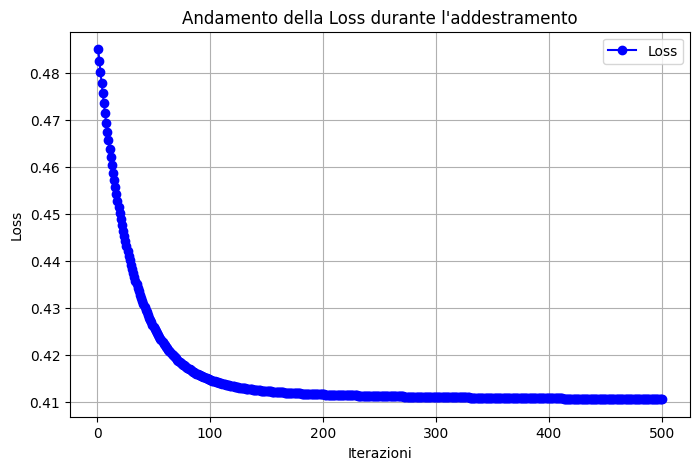

In [69]:
iterations = np.arange(1, len(loss_history1) + 1)  # iter è il numero totale di iterazioni

# Plotting della loss rispetto al numero di iterazioni
plt.figure(figsize=(8, 5))
plt.plot(iterations, loss_history1, marker='o', linestyle='-', color='b', label='Loss')
plt.xlabel('Iterazioni')
plt.ylabel('Loss')
plt.title('Andamento della Loss durante l\'addestramento')
plt.grid(True)
plt.legend()
plt.show()

#### **Modelling dataframe df2**

In [73]:
X2_train, X2_test, y2_train, y2_test = split_norm(df2, 'Price')
w2, b2, loss_history2=linearreg_gd(X2_train,y2_train,500,0.01,-0.1,0.1,0.6)


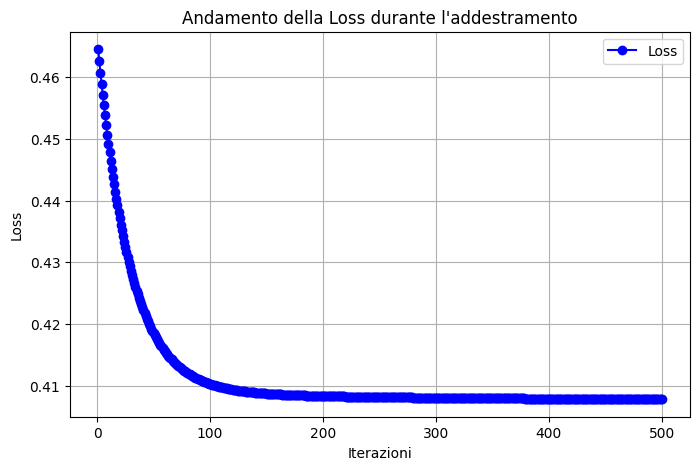

In [74]:
iterations = np.arange(1, len(loss_history2) + 1)  # iter è il numero totale di iterazioni

# Plotting della loss rispetto al numero di iterazioni
plt.figure(figsize=(8, 5))
plt.plot(iterations, loss_history2, marker='o', linestyle='-', color='b', label='Loss')
plt.xlabel('Iterazioni')
plt.ylabel('Loss')
plt.title('Andamento della Loss durante l\'addestramento')
plt.grid(True)
plt.legend()
plt.show()

#### **Modelling dataframe df3**

In [75]:
X3_train, X3_test, y3_train, y3_test = split_norm(df3, 'Price')
w3, b3, loss_history3=linearreg_gd(X3_train,y3_train,500,0.01,-0.1,0.1,0.6)

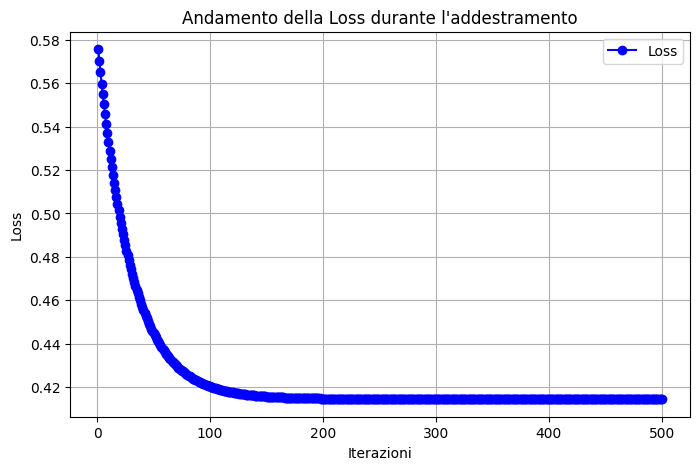

In [76]:
iterations = np.arange(1, len(loss_history3) + 1)  # iter è il numero totale di iterazioni

# Plotting della loss rispetto al numero di iterazioni
plt.figure(figsize=(8, 5))
plt.plot(iterations, loss_history3, marker='o', linestyle='-', color='b', label='Loss')
plt.xlabel('Iterazioni')
plt.ylabel('Loss')
plt.title('Andamento della Loss durante l\'addestramento')
plt.grid(True)
plt.legend()
plt.show()

#### **Modelling dataframe df4**

In [77]:
X4_train, X4_test, y4_train, y4_test = split_norm(df3, 'Price')
w4, b4, loss_history4=linearreg_gd(X4_train,y4_train,500,0.01,-0.1,0.1,0.6)

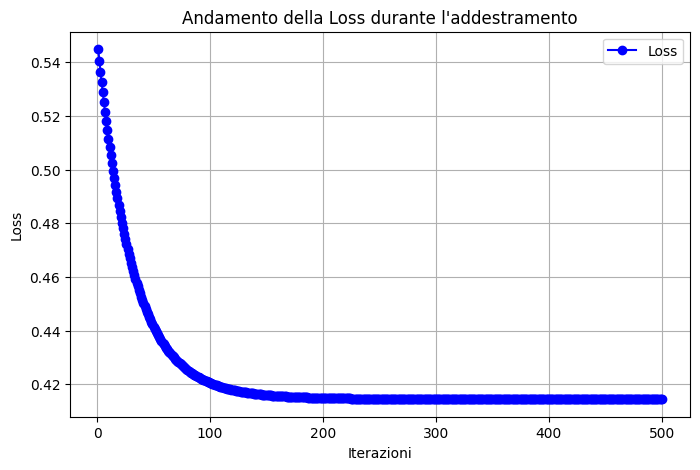

In [78]:
iterations = np.arange(1, len(loss_history4) + 1)  # iter è il numero totale di iterazioni

# Plotting della loss rispetto al numero di iterazioni
plt.figure(figsize=(8, 5))
plt.plot(iterations, loss_history4, marker='o', linestyle='-', color='b', label='Loss')
plt.xlabel('Iterazioni')
plt.ylabel('Loss')
plt.title('Andamento della Loss durante l\'addestramento')
plt.grid(True)
plt.legend()
plt.show()

### **Evaluation model**

Let us see how well the model fits the data and how accurate the prediction of dependent variables is.

In [79]:
def compute_test_loss(X,y,w,b):
    pred=predict(X,w,b)
    loss=np.mean(np.square(pred-y))
    return loss

#### **Testing on dataframe df1**

In [80]:
compute_test_loss(X1_test, y1_test, w1, b1)

0.8374452988879503

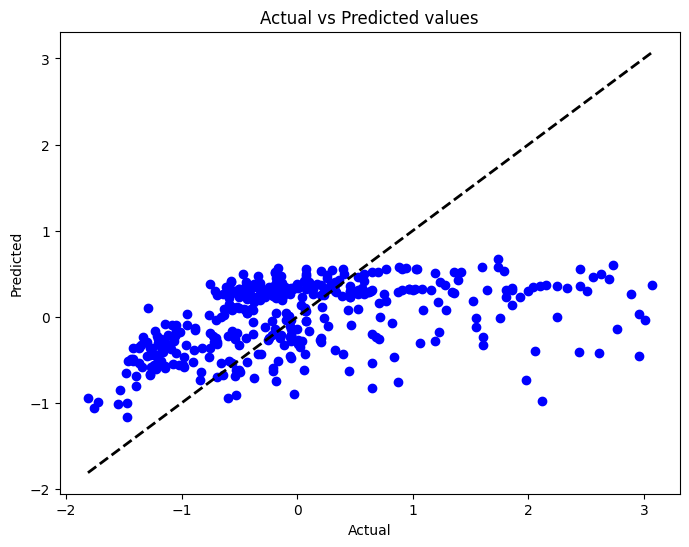

In [81]:
y1_pred=np.dot(X1_test,w1)+b1
plt.figure(figsize=(8, 6))
plt.scatter(y1_test, y1_pred, color='blue')
plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted values')
plt.show()

#### **Testing on dataframe df2**

In [82]:
compute_test_loss(X2_test, y2_test, w2, b2)

0.859606777491162

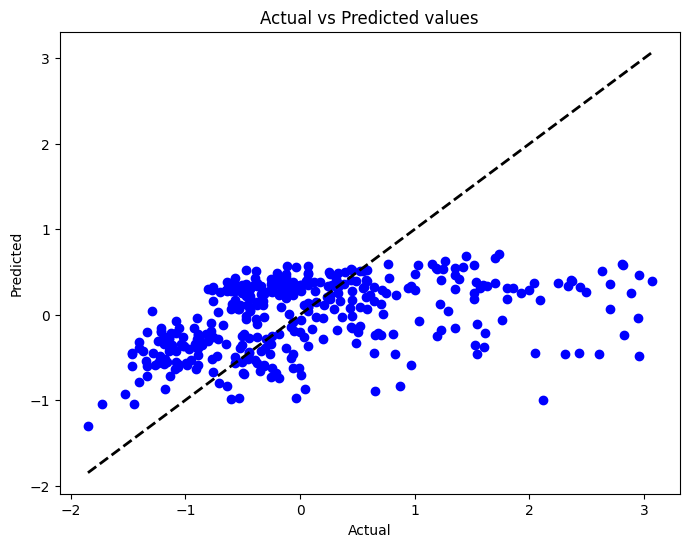

In [83]:
y2_pred=np.dot(X2_test,w2)+b2
plt.figure(figsize=(8, 6))
plt.scatter(y2_test, y2_pred, color='blue')
plt.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted values')
plt.show()

#### **Testing on dataframe df3**

In [84]:
compute_test_loss(X3_test, y3_test, w3, b3)

0.8146713789074347

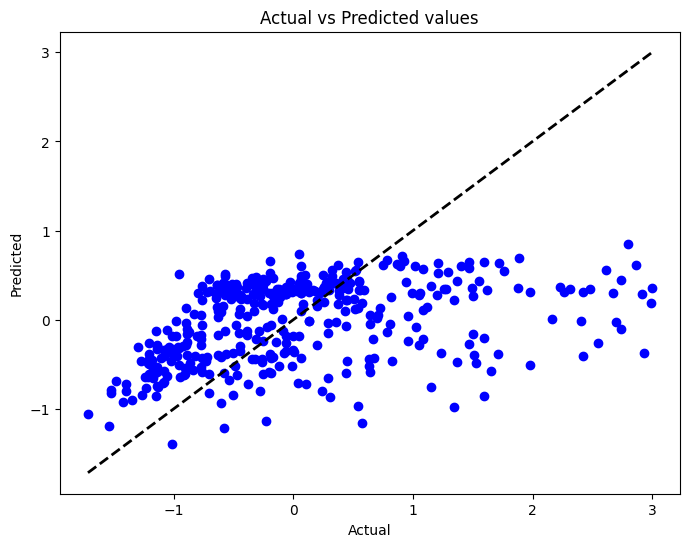

In [85]:
y3_pred=np.dot(X3_test,w3)+b3
plt.figure(figsize=(8, 6))
plt.scatter(y3_test, y3_pred, color='blue')
plt.plot([y3_test.min(), y3_test.max()], [y3_test.min(), y3_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted values')
plt.show()

#### **Testing on dataframe df4**

In [86]:
compute_test_loss(X4_test, y4_test, w4, b4)

0.8146697621611221

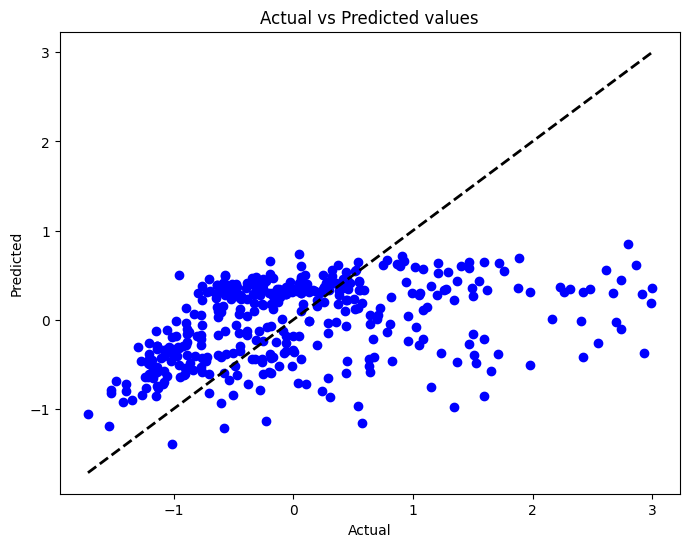

In [87]:
y4_pred=np.dot(X4_test,w4)+b4
plt.figure(figsize=(8, 6))
plt.scatter(y4_test, y4_pred, color='blue')
plt.plot([y4_test.min(), y4_test.max()], [y4_test.min(), y4_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted values')
plt.show()

In [88]:
metrics = [
    {'Dataframe': 'df1', 'train_loss': loss_history1[len(loss_history1)-1], 'test_loss': compute_test_loss(X1_test, y1_test, w1, b1), 'r2_score':r2_score(y1_test,y1_pred)},
    {'Dataframe': 'df2', 'train_loss': loss_history2[len(loss_history2)-1], 'test_loss': compute_test_loss(X2_test, y2_test, w2, b2), 'r2_score':r2_score(y2_test,y2_pred)},
    {'Dataframe': 'df3', 'train_loss': loss_history3[len(loss_history3)-1], 'test_loss': compute_test_loss(X3_test, y3_test, w3, b3), 'r2_score':r2_score(y3_test,y3_pred)},
    {'Dataframe': 'df4', 'train_loss': loss_history4[len(loss_history4)-1], 'test_loss': compute_test_loss(X4_test, y4_test, w4, b4), 'r2_score':r2_score(y4_test,y4_pred)},
]

In [89]:
metrics=pd.DataFrame(metrics)
display(metrics)

Dataframe  train_loss  test_loss  r2_score
0       df1    0.410517   0.837445  0.205559
1       df2    0.407793   0.859607  0.167493
2       df3    0.414442   0.814671  0.141132
3       df4    0.414443   0.814670  0.141134

## **Conclusion**

The best dataset turns out to be first dataset (**df1**), where null values were replaced with statistical metrics. Evaluating the regression model on this dataset yields a higher R2 score and a lower mean squared error.